# 데이터

참고 자료: KoBERT를 이용한 감정분류 작업(https://github.com/BBARRY-Lee/Practice-NLP/blob/main/KoBERT%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EA%B0%90%EC%A0%95%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb)

In [2]:
import pandas as pd
# [AI Hub] 감정 분류를 위한 대화 음성 데이터셋 불러오기
data = pd.read_csv("./5th_2nd_19374.csv")

In [3]:
data.head()

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,angry,2,surprise,2,happiness,2,happiness,2,happiness,2,48,female
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,neutral,0,happiness,2,happiness,2,happiness,2,happiness,2,48,female
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,2,48,female
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,1,48,female
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness,2,happiness,1,happiness,2,happiness,1,happiness,1,48,female


In [4]:
# 7개의 감정 class → 숫자
data.loc[(data['상황'] == "fear"), '상황'] = 0  # fear → 0
data.loc[(data['상황'] == "surprise"), '상황'] = 1  # surprise → 1
data.loc[(data['상황'] == "angry"), '상황'] = 2  # angry → 2
data.loc[(data['상황'] == "sadness"), '상황'] = 3  # sadness → 3
data.loc[(data['상황'] == "neutral"), '상황'] = 4  # neutral → 4
data.loc[(data['상황'] == "happiness"), '상황'] = 5  # happiness → 5
data.loc[(data['상황'] == "disgust"), '상황'] = 6  # disgust → 6

In [5]:
data['상황'].unique()

array([5, 4, 3, 2, 1, 6, 0], dtype=object)

In [6]:
# [발화문, 상황] data_list 생성
data_list = []
for ques, label in zip (data['발화문'], data['상황']):
  data = []
  data.append(ques)
  data.append(str(label))

  data_list.append(data)
    
print(data)
print(data_list[:10])
     

['걱정해줘서 고마워.', '6']
[['헐! 나 이벤트에 당첨 됐어.', '5'], ['내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.', '5'], ['한 명 뽑는 거였는데, 그게 바로 내가 된 거야.', '5'], ['당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. 그래서 못 산 향수야.', '5'], ['에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.', '4'], ['난 부페 형식의 음식들도 정말 좋아해. 그 것도 좀 알려 줘.', '4'], ['응. 완전히 끝난 거야. 한 달 동안 주말에 쉬지도 못하고 일만 했거든.', '5'], ['신나는 음악 듣는 것도 좋고, 어디 여행 가고 싶고 이 것 저 것 다 해보고 싶어.', '5'], ['친구들도 내 연락 기다리고 있을 텐데 내가 까먹고 있었네?', '5'], ['그래. 일단은 친구들부터 만나서 여행 계획에 대해서 얘기 좀 해봐야 되겠어.', '5']]


In [7]:
# Split train & test data set
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(data_list, test_size = 0.2, shuffle = True, random_state = 32)

In [8]:
print('훈련 데이터 길이:{}, 테스트 데이터 길이:{}'.format(len(dataset_train), len(dataset_test)))

훈련 데이터 길이:15499, 테스트 데이터 길이:3875


# 모델

In [10]:
pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-zqiovm8h
  Running command git clone --filter=blob:none -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-zqiovm8h
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 129 kB 6.5 MB/s            
     |████████████████████████████████| 344 kB 46.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 54.7 MB 22 kB/s              
     |████████████████████████████████| 4.5 MB 89.8 MB/s            
     |████████████████████████████████| 2.5 MB 93.7 MB/s            
     |████████████████████████████████| 73 kB 3.1 MB/s             
     |████████████████████████████████| 6.7 MB 66.0 MB/s            
     |████████████████████████████████| 127 kB 75.9 MB/s            
  Created wheel for kobert: fil

In [11]:
from kobert.pytorch_kobert import get_pytorch_kobert_model
# BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

using cached model. /aiffel/aiffel/dktc/.cache/kobert_v1.zip
using cached model. /aiffel/aiffel/dktc/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [12]:
from kobert.utils import get_tokenizer
import gluonnlp as nlp

#토크나이저 초기화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

using cached model. /aiffel/aiffel/dktc/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [13]:
# 파라미터

# parameter 값 출처 : https://github.com/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5  
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5
     

In [15]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
# BERTDataset : 각 데이터가 BERT 모델의 입력으로 들어갈 수 있도록 tokenization, int encoding, padding하는 함수

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len, pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab = vocab, pad = pad, pair = pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

data_train = BERTDataset(dataset_train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, vocab, max_len, True, False)

In [16]:
import torch
# torch 형식의 dataset을 만들어주면서, 입력 데이터셋의 전처리
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [17]:
# GPU 사용
device = torch.device("cuda:0") 

In [1]:
if torch.cuda.is_available():
    print(f"GPU Brand & Model: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("No GPU found.")

GPU Brand & Model: Tesla T4


In [18]:
from torch import nn
# 모델 구현

# KoBERT 오픈소스 내 예제코드 : https://github.com/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 7,   # 클래스 수 조정
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

model = BERTClassifier(bertmodel,  dr_rate = 0.5).to(device)

In [21]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

# optimizer와 schedule 설정
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)

In [22]:
# calc_accuracy : 정확도 측정을 위한 함수
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

# 훈련

In [24]:
import os
from tqdm import tqdm, tqdm_notebook

# 모델 저장 경로 설정
model_save_path = 'saved_models'
os.makedirs(model_save_path, exist_ok=True)

# 로스와 정확도 기록을 위한 리스트
train_history = []
test_history = []
train_loss_history = []
test_loss_history = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    total_train_loss = 0.0
    total_test_loss = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        loss = loss_fn(out, label)
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_history.append(avg_train_loss)
    train_history.append(train_acc / len(train_dataloader))

    model.eval()
    with torch.no_grad():  # 평가 단계에서는 그래디언트 계산을 하지 않음
        for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)

            loss = loss_fn(out, label)
            total_test_loss += loss.item()
            test_acc += calc_accuracy(out, label)

    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_history.append(avg_test_loss)
    test_history.append(test_acc / len(test_dataloader))

    # 모델 저장
    torch.save(model.state_dict(), os.path.join(model_save_path, f'kobert_model_epoch_{e+1}.pt'))
    print(f"Epoch {e+1} Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_acc / len(train_dataloader):.4f}")
    print(f"Epoch {e+1} Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc / len(test_dataloader):.4f}")


/tmp/ipykernel_47/361544125.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/243 [00:00<?, ?it/s]

/tmp/ipykernel_47/361544125.py:41: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for token_ids, valid_length, segment_ids, label in tqdm_notebook(test_dataloader):


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch 1 Train Loss: 1.0265, Train Accuracy: 0.6413
Epoch 1 Test Loss: 0.3526, Test Accuracy: 0.8917


  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch 2 Train Loss: 0.2805, Train Accuracy: 0.9118
Epoch 2 Test Loss: 0.3039, Test Accuracy: 0.9096


  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch 3 Train Loss: 0.1759, Train Accuracy: 0.9436
Epoch 3 Test Loss: 0.2939, Test Accuracy: 0.9168


  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.1083, Train Accuracy: 0.9654
Epoch 4 Test Loss: 0.2871, Test Accuracy: 0.9258


  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.0741, Train Accuracy: 0.9758
Epoch 5 Test Loss: 0.2898, Test Accuracy: 0.9267


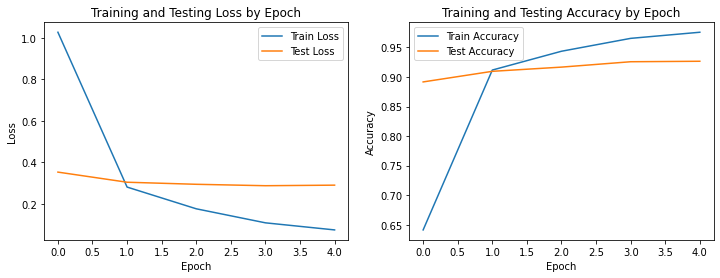

In [25]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss by Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_history, label='Train Accuracy')
plt.plot(test_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Epoch')
plt.legend()

plt.show()

# Test

In [ ]:
# 에포크별로 저장된 모델 불러오기
# model.load_state_dict(torch.load('saved_models/kobert_model_epoch_1.pt'))

In [ ]:
# predict : 학습 모델을 활용하여 다중 분류된 클래스를 출력해주는 함수
import pandas as pd
from tqdm.notebook import tqdm  # Jupyter Notebook에 최적화된 tqdm

# 수정된 predict 함수: 각 감정에 대한 점수를 반환
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]
    another_test = BERTDataset(dataset_another, 0, 1, tok, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=1, num_workers=5)

    model.eval()

    emotion_scores = []
    for token_ids, valid_length, segment_ids, label in test_dataloader:
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        out = model(token_ids, valid_length, segment_ids)
        logits = out.detach().cpu().numpy()
        emotion_scores.append(logits[0])

    return emotion_scores

# 데이터프레임 예제
data = {
    'conversation': ["지금 너 스스로를 죽여달라고 애원하는 것인가?\n아닙니다. 죄송합니다.\n죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n정말 잘못했습니다.\n너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n죄송합니다. 정말 잘못했습니다.\n너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n선택 못하겠습니다. 한번만 도와주세요.\n그냥 다 죽여버려야겠군. 이의 없지?\n제발 도와주세요.", "길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야."],
    'label': [1, 0]
}

df = pd.DataFrame(data)

# 감정 사전
emotion_dict = ['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']

total_conversations = len(df['conversation'])

In [40]:
def process_conversation(conv):
    sentences = conv.split('\n')
    return [predict(sentence) for sentence in sentences]

# tqdm 설정
tqdm.pandas(total=total_conversations, desc="Overall Progress")

df['emotion_scores'] = df['conversation'].progress_apply(process_conversation)

Overall Progress:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


                                        conversation  label  \
0  지금 너 스스로를 죽여달라고 애원하는 것인가?\n아닙니다. 죄송합니다.\n죽을 거면...      1   
1  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...      0   

                                      emotion_scores  
0  [[[2.6805646, -1.9741364, -0.95007706, 4.08811...  
1  [[[1.1514355, -0.42261186, -2.295501, -1.61657...  


In [41]:
df['emotion_scores'][0]

[[array([ 2.6805646e+00, -1.9741364e+00, -9.5007706e-01,  4.0881133e+00,
         -1.1892773e+00, -1.4454670e+00,  2.7713906e-03], dtype=float32)],
 [array([-1.040121  , -0.9563573 ,  0.5896246 , -0.4381662 ,  1.848123  ,
          0.48221305, -0.7079791 ], dtype=float32)],
 [array([-0.6115403 , -2.1649475 ,  0.18623857, -0.91489315,  5.042308  ,
         -2.1023932 ,  0.27550647], dtype=float32)],
 [array([ 0.40403336, -2.3818936 , -0.31525066, -0.25913924,  2.964849  ,
         -1.7246277 ,  1.7326506 ], dtype=float32)],
 [array([ 4.050247  , -1.4763105 , -1.5798686 ,  2.1995354 , -1.8935599 ,
         -0.14705527,  0.2720012 ], dtype=float32)],
 [array([ 0.0704916, -1.8422381, -1.0883675, -0.7910026,  1.3812371,
         -1.1476194,  4.0195937], dtype=float32)],
 [array([-0.5033341 , -1.7819716 ,  5.027901  ,  1.5170518 , -2.5175648 ,
         -0.52030236, -1.3214637 ], dtype=float32)],
 [array([-1.0606773, -2.8192358,  3.6609685,  1.5193533, -2.0806572,
         -1.2297208,  2.0855

In [48]:
train_data = pd.read_csv("./data/train.csv")

In [50]:
train_data = train_data.drop(columns=['idx'])
train_data.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [51]:
label_to_int = {'협박 대화': 0, '갈취 대화': 1, '직장 내 괴롭힘 대화': 2, '기타 괴롭힘 대화':3}

train_data['class'] = train_data['class'].map(label_to_int)

In [52]:
train_data.head()

,class,conversation
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [ ]:
# tqdm 설정
ds
total_conversations = len(train_data['conversation'])
tqdm.pandas(total=total_conversations, desc="Overall Progress")

train_data['emotion_scores'] = train_data['conversation'].progress_apply(process_conversation)

Overall Progress:   0%|          | 0/3950 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [53]:
int_to_label = {0: '협박 대화', 1: '갈취 대화', 2: '직장 내 괴롭힘 대화', 3: '기타 괴롭힘 대화'}

## Grad-CAM Text 적용해보기

In [ ]:
# https://github.com/HaebinShin/grad-cam-text